In [56]:
# Load library
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image as grayscale
image = cv2.imread("/content/plane.jpg", cv2.IMREAD_GRAYSCALE)

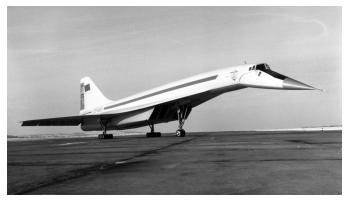

In [57]:
# Show image
plt.imshow(image, cmap="gray"), plt.axis("off")
plt.show()

In [58]:
# Show data type
type(image)

numpy.ndarray

In [59]:
#Show Image Data
image

array([[168, 161, 161, ..., 212, 222, 207],
       [165, 161, 164, ..., 212, 213, 210],
       [164, 165, 169, ..., 215, 207, 215],
       ...,
       [ 37,  38,  40, ..., 111, 113, 118],
       [ 41,  43,  46, ..., 113, 119, 123],
       [ 46,  44,  44, ..., 121, 124, 123]], dtype=uint8)

In [60]:
# Show dimensions
image.shape

(1080, 1920)

In [61]:
# Show first pixel
image[0,0]

168

In [62]:
# Load image in color
image_bgr = cv2.imread("/content/plane.jpg", cv2.IMREAD_COLOR)

# Show pixel
image_bgr[0,0]

array([221, 178, 127], dtype=uint8)

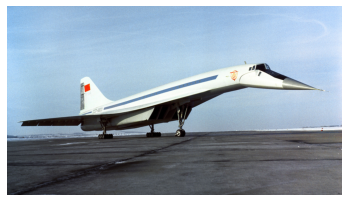

In [63]:
# Convert to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()

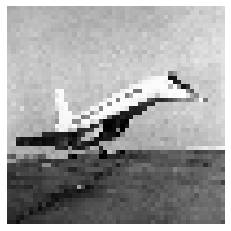

In [64]:
# Load image as grayscale
image = cv2.imread("/content/plane.jpg", cv2.IMREAD_GRAYSCALE)

# Resize image to 50 pixels by 50 pixels
image_50x50 = cv2.resize(image, (50, 50))

# View image
plt.imshow(image_50x50, cmap="gray"), plt.axis("off")
plt.show()

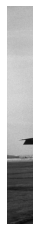

In [65]:
# Load image in grayscale
image = cv2.imread("/content/plane.jpg", cv2.IMREAD_GRAYSCALE)

# Select first half of the columns and all rows
image_cropped = image[:,:128]

# Show image
plt.imshow(image_cropped, cmap="gray"), plt.axis("off")
plt.show()

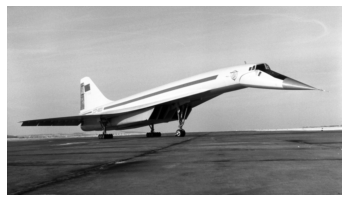

In [66]:
# Load image as grayscale
image = cv2.imread("/content/plane.jpg", cv2.IMREAD_GRAYSCALE)

# Blur image
image_blurry = cv2.blur(image, (5,5))

# Show image
plt.imshow(image_blurry, cmap="gray"), plt.axis("off")
plt.show()

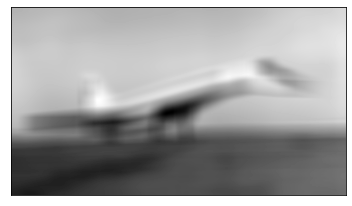

In [67]:
# Blur image
image_very_blurry = cv2.blur(image, (100,100))

# Show image
plt.imshow(image_very_blurry, cmap="gray"), plt.xticks([]), plt.yticks([])
plt.show()

In [68]:
# Create kernel
kernel = np.ones((5,5)) / 25.0

# Show kernel
kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

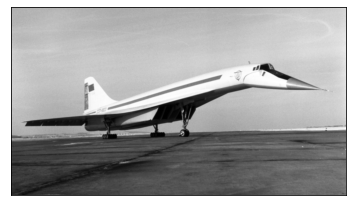

In [69]:
# Apply kernel
image_kernel = cv2.filter2D(image, -1, kernel)

# Show image
plt.imshow(image_kernel, cmap="gray"), plt.xticks([]), plt.yticks([])
plt.show()

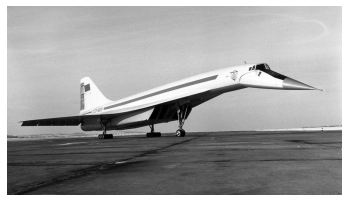

In [70]:
# Load image as grayscale
image = cv2.imread("/content/plane.jpg", cv2.IMREAD_GRAYSCALE)

# Create kernel
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])

# Sharpen image
image_sharp = cv2.filter2D(image, -1, kernel)

# Show image
plt.imshow(image_sharp, cmap="gray"), plt.axis("off")
plt.show()

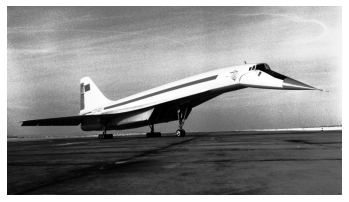

In [71]:
# Enhance image
image_enhanced = cv2.equalizeHist(image)

# Show image
plt.imshow(image_enhanced, cmap="gray"), plt.axis("off")
plt.show()

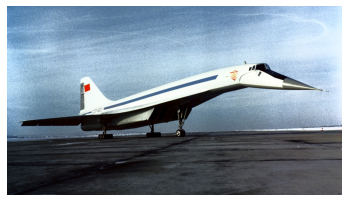

In [72]:
# Load image
image_bgr = cv2.imread("/content/plane.jpg")

# Convert to YUV
image_yuv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2YUV)

# Apply histogram equalization
image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0])

# Convert to RGB
image_rgb = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)

# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()

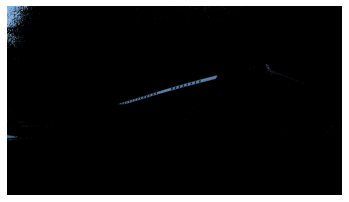

In [73]:
# Convert BGR to HSV
image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)

# Define range of blue values in HSV
lower_blue = np.array([50,100,50])
upper_blue = np.array([130,255,255])

# Create mask
mask = cv2.inRange(image_hsv, lower_blue, upper_blue)

# Mask image
image_bgr_masked = cv2.bitwise_and(image_bgr, image_bgr, mask=mask)

# Convert BGR to RGB
image_rgb = cv2.cvtColor(image_bgr_masked, cv2.COLOR_BGR2RGB)

# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()

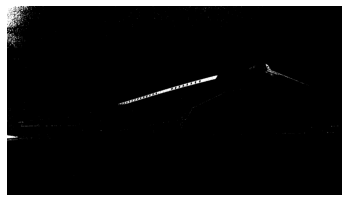

In [74]:
# Show image
plt.imshow(mask, cmap='gray'), plt.axis("off")
plt.show()

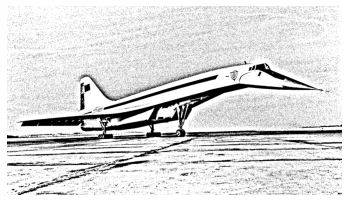

In [75]:
# Load image as grayscale
image_grey = cv2.imread("/content/plane.jpg", cv2.IMREAD_GRAYSCALE)

# Apply adaptive thresholding
max_output_value = 255
neighborhood_size = 99
subtract_from_mean = 10
image_binarized = cv2.adaptiveThreshold(image_grey,
                                        max_output_value,
                                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY,
                                        neighborhood_size,
                                        subtract_from_mean)

# Show image
plt.imshow(image_binarized, cmap="gray"), plt.axis("off")
plt.show()

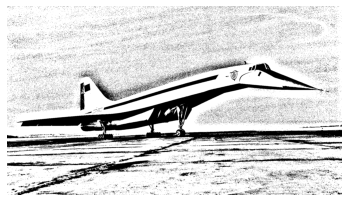

In [76]:
# Apply cv2.ADAPTIVE_THRESH_MEAN_C
image_mean_threshold = cv2.adaptiveThreshold(image_grey,
                                             max_output_value,
                                             cv2.ADAPTIVE_THRESH_MEAN_C,
                                             cv2.THRESH_BINARY,
                                             neighborhood_size,
                                             subtract_from_mean)

# Show image
plt.imshow(image_mean_threshold, cmap="gray"), plt.axis("off")
plt.show()

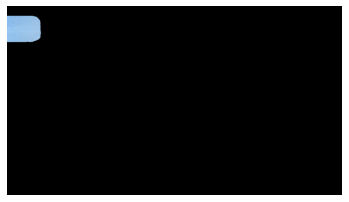

In [78]:
# Load image and convert to RGB
image_bgr = cv2.imread('/content/plane.jpg')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Rectangle values: start x, start y, width, height
rectangle = (0, 56, 256, 150)

# Create initial mask
mask = np.zeros(image_rgb.shape[:2], np.uint8)

# Create temporary arrays used by grabCut
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# Run grabCut
cv2.grabCut(image_rgb, # Our image
            mask, # The Mask
            rectangle, # Our rectangle
            bgdModel, # Temporary array for background
            fgdModel, # Temporary array for background
            5, # Number of iterations
            cv2.GC_INIT_WITH_RECT) # Initiative using our rectangle

# Create mask where sure and likely backgrounds set to 0, otherwise 1
mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')

# Multiply image with new mask to subtract background
image_rgb_nobg = image_rgb * mask_2[:, :, np.newaxis]

# Show image
plt.imshow(image_rgb_nobg), plt.axis("off")
plt.show()

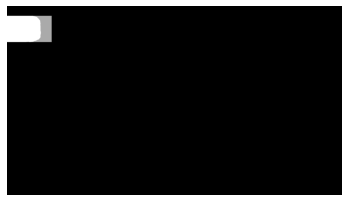

In [79]:
# Show mask
plt.imshow(mask, cmap='gray'), plt.axis("off")
plt.show()

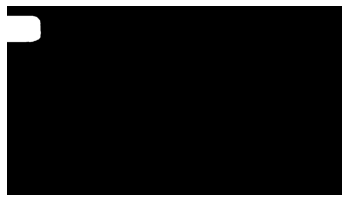

In [80]:
# Show mask
plt.imshow(mask_2, cmap='gray'), plt.axis("off")
plt.show()

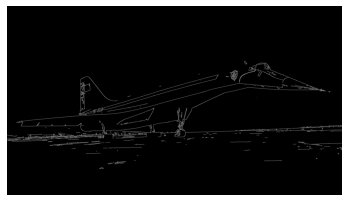

In [82]:
# Load Image as Gray
image_gray = cv2.imread("/content/plane.jpg", cv2.IMREAD_GRAYSCALE)

# Calculate median intensity
median_intensity = np.median(image_gray)

# Set thresholds to be one standard deviation above and below median intensity
lower_threshold = int(max(0, (1.0 - 0.33) * median_intensity))
upper_threshold = int(min(255, (1.0 + 0.33) * median_intensity))

# Apply canny edge detector
image_canny = cv2.Canny(image_gray, lower_threshold, upper_threshold)

# Show image
plt.imshow(image_canny, cmap="gray"), plt.axis("off")
plt.show()

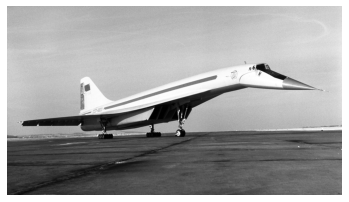

In [84]:
# Load image as grayscale
image_bgr = cv2.imread("/content/plane.jpg")
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
image_gray = np.float32(image_gray)

# Set corner detector parameters
block_size = 2
aperture = 29
free_parameter = 0.04

# Detect corners
detector_responses = cv2.cornerHarris(image_gray,
                                      block_size,
                                      aperture,
                                      free_parameter)

# Large corner markers
detector_responses = cv2.dilate(detector_responses, None)

# Only keep detector responses greater than threshold, mark as white
threshold = 0.02
image_bgr[detector_responses >
          threshold *
          detector_responses.max()] = [255,255,255]

# Convert to grayscale
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

# Show image
plt.imshow(image_gray, cmap="gray"), plt.axis("off")
plt.show()

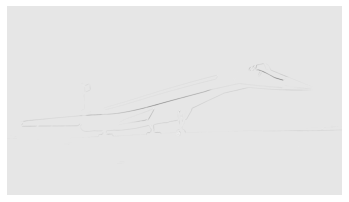

In [85]:
# Show potential corners
plt.imshow(detector_responses, cmap='gray'), plt.axis("off")
plt.show()

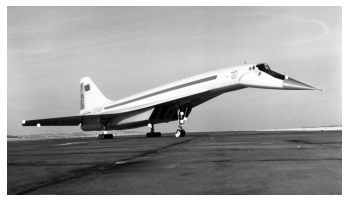

In [86]:
# Number of corners to detect
corners_to_detect = 10
minimum_quality_score = 0.05
minimum_distance = 25

# Detect corners
corners = cv2.goodFeaturesToTrack(image_gray,
                                  corners_to_detect,
                                  minimum_quality_score,
                                  minimum_distance)
corners = np.float32(corners)

# Draw white circle at each corner
for corner in corners:
    x, y = corner[0]
    cv2.circle(image_bgr, (x,y), 10, (255,255,255), -1)

# Convert to grayscale
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

# Show image
plt.imshow(image_rgb, cmap='gray'), plt.axis("off")
plt.show()

In [87]:
# Load image as grayscale
image = cv2.imread("/content/plane.jpg", cv2.IMREAD_GRAYSCALE)

# Resize image to 10 pixels by 10 pixels
image_10x10 = cv2.resize(image, (10, 10))

# Convert image data to one-dimensional vector
image_10x10.flatten()

array([178, 187, 184, 181, 167, 185, 197, 183, 212, 200, 186, 189, 188,
       187, 189, 194, 187, 199, 192, 227, 195, 184, 201, 194, 203, 209,
       201, 212, 217, 219, 194, 199, 201, 201, 205, 199, 247, 252, 203,
       197, 197, 193, 248, 190, 250, 251,  43, 192, 212, 193, 180, 180,
       238, 218,   2,  24, 186, 195, 198, 202, 173, 153,  44,  32, 171,
       169, 167, 169, 209, 220,  65,  49,  74,  66,  66,  96, 105,  97,
       103, 109,  56,  51,  53,  28,  70,  94,  70,  96, 102, 115,  48,
        46,  73,  80,  93,  85,  84,  93, 107, 104], dtype=uint8)

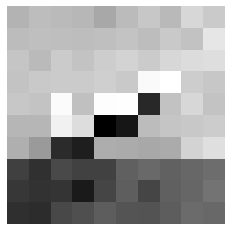

In [88]:
plt.imshow(image_10x10, cmap="gray"), plt.axis("off")
plt.show()

In [89]:
image_10x10.shape

(10, 10)

In [90]:
image_10x10.flatten().shape

(100,)

In [91]:
# Load image in color
image_color = cv2.imread("/content/plane.jpg", cv2.IMREAD_COLOR)

# Resize image to 10 pixels by 10 pixels
image_color_10x10 = cv2.resize(image_color, (10, 10))

# Convert image data to one-dimensional vector, show dimensions
image_color_10x10.flatten().shape

(300,)

In [92]:
# Load image in grayscale
image_256x256_gray = cv2.imread("/content/plane.jpg", cv2.IMREAD_GRAYSCALE)

# Convert image data to one-dimensional vector, show dimensions
image_256x256_gray.flatten().shape

(2073600,)

In [93]:
# Load image in color
image_256x256_color = cv2.imread("/content/plane.jpg", cv2.IMREAD_COLOR)

# Convert image data to one-dimensional vector, show dimensions
image_256x256_color.flatten().shape

(6220800,)

In [94]:
# Load image as BGR
image_bgr = cv2.imread("/content/plane.jpg", cv2.IMREAD_COLOR)

# Calculate the mean of each channel
channels = cv2.mean(image_bgr)

# Swap blue and red values (making it RGB, not BGR)
observation = np.array([(channels[2], channels[1], channels[0])])

# Show mean channel values
observation

array([[135.79055459, 152.59052566, 168.61461179]])

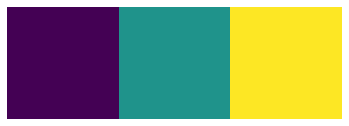

In [95]:
# Show image
plt.imshow(observation), plt.axis("off")
plt.show()

In [96]:
# Load image
image_bgr = cv2.imread("/content/plane.jpg", cv2.IMREAD_COLOR)

# Convert to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Create a list for feature values
features = []

# Calculate the histogram for each color channel
colors = ("r","g","b")

# For each channel: calculate histogram and add to feature value list
for i, channel in enumerate(colors):
    histogram = cv2.calcHist([image_rgb], # Image
                        [i], # Index of channel
                        None, # No mask
                        [256], # Histogram size
                        [0,256]) # Range
    features.extend(histogram)

# Create a vector for an observation's feature values
observation = np.array(features).flatten()

# Show the observation's value for the first five features
observation[0:5]

array([1238., 3337., 1290.,  890.,  743.], dtype=float32)

In [97]:
# Show RGB channel values
image_rgb[0,0]

array([127, 178, 221], dtype=uint8)

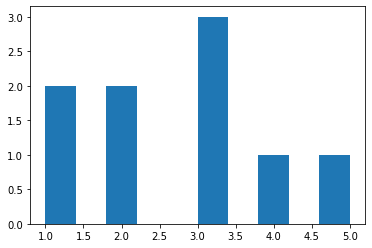

In [98]:
# Import pandas
import pandas as pd

# Create some data
data = pd.Series([1, 1, 2, 2, 3, 3, 3, 4, 5])

# Show the histogram
data.hist(grid=False)
plt.show()

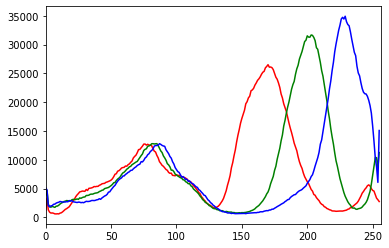

In [99]:
# Calculate the histogram for each color channel
colors = ("r","g","b")

# For each channel: calculate histogram, make plot
for i, channel in enumerate(colors):
    histogram = cv2.calcHist([image_rgb], # Image
                        [i], # Index of channel
                        None, # No mask
                        [256], # Histogram size
                        [0,256]) # Range
    plt.plot(histogram, color = channel)
    plt.xlim([0,256])

# Show plot
plt.show()

THE END
